In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('epl-goalScorer(20-21).csv')


In [3]:
print("Dataset Info:")
print("="*50)
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    522 non-null    int64  
 1   id            522 non-null    int64  
 2   player_name   522 non-null    object 
 3   games         522 non-null    int64  
 4   time          522 non-null    int64  
 5   goals         522 non-null    int64  
 6   xG            522 non-null    float64
 7   assists       522 non-null    int64  
 8   xA            522 non-null    float64
 9   shots         522 non-null    int64  
 10  key_passes    522 non-null    int64  
 11  yellow_cards  522 non-null    int64  
 12  red_cards     522 non-null    int64  
 13  position      522 non-null    object 
 14  team_title    522 non-null    object 
 15  npg           522 non-null    int64  
 16  npxG          522 non-null    float64
 17  xGChain       522 non-null    float64
 18  xGBuildup     52

In [4]:
print("\nFirst few rows of the dataset:")
print("="*50)
display(df.head())


First few rows of the dataset:


,Unnamed: 0,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,0,647,Harry Kane,35,3097,23,22.174859,14,7.577094,138,49,1,0,F,Tottenham,19,19.130183,24.995648,4.451257
1,1,1250,Mohamed Salah,37,3085,22,20.250847,5,6.528526,126,55,0,0,F M S,Liverpool,16,15.683834,28.968234,9.800236
2,2,1228,Bruno Fernandes,37,3117,18,16.019454,12,11.474996,121,95,6,0,M S,Manchester United,9,8.407840,26.911412,11.932285
3,3,453,Son Heung-Min,37,3139,17,11.023287,10,9.512992,68,75,0,0,F M S,Tottenham,16,10.262118,20.671916,6.608751
4,4,822,Patrick Bamford,38,3085,17,18.401863,7,3.782247,107,30,3,0,F S,Leeds,15,16.879525,23.394953,4.131796


In [5]:
print("\nMissing Values:")
print("="*50)
print(df.isnull().sum())


Missing Values:
Unnamed: 0      0
id              0
player_name     0
games           0
time            0
goals           0
xG              0
assists         0
xA              0
shots           0
key_passes      0
yellow_cards    0
red_cards       0
position        0
team_title      0
npg             0
npxG            0
xGChain         0
xGBuildup       0
dtype: int64


In [9]:
def analyze_scoring_efficiency():
    """Analyze player scoring efficiency (Goals vs xG)"""
    plt.figure(figsize=(10, 6))
    plt.scatter(df['xG'], df['goals'], alpha=0.6)
    plt.plot([0, df['xG'].max()], [0, df['xG'].max()], 'r--')  # Reference line
    plt.xlabel('Expected Goals (xG)')
    plt.ylabel('Actual Goals')
    plt.title('Goals vs Expected Goals')

    for idx, row in df.iterrows():
        if abs(row['goals'] - row['xG']) > 2:  # Highlight significant differences
            plt.annotate(row['player_name'],
                        (row['xG'], row['goals']),
                        xytext=(5, 5), textcoords='offset points')
    # The following two lines were incorrectly indented.
    # They should be aligned with the for loop or the function definition.
    plt.tight_layout()
    plt.show()

In [20]:
def position_analysis():
    """Analyze statistics by position"""
    # Create position statistics
    position_stats = df.groupby('position').agg({
        'goals': 'mean',
        'assists': 'mean',
        'shots': 'mean',
        'key_passes': 'mean'
    }).round(2)

    print("\nAverage Statistics by Position:")
    print("="*50) #Corrected the multiplication to print '=' 50 times.
    print(position_stats)

    position_stats.plot(kind='bar', figsize=(12, 6))
    plt.title('Average Statistics by Position')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [21]:
def top_performers(n=10):
    """Display top performers in various categories"""
    categories = ['goals', 'assists', 'xGChain', 'xGBuildup']

    for category in categories:
        print(f"\nTop {n} Players by {category}:")
        print("="*50)
        display(df.nlargest(n, category)[['player_name', 'team_title', category]])


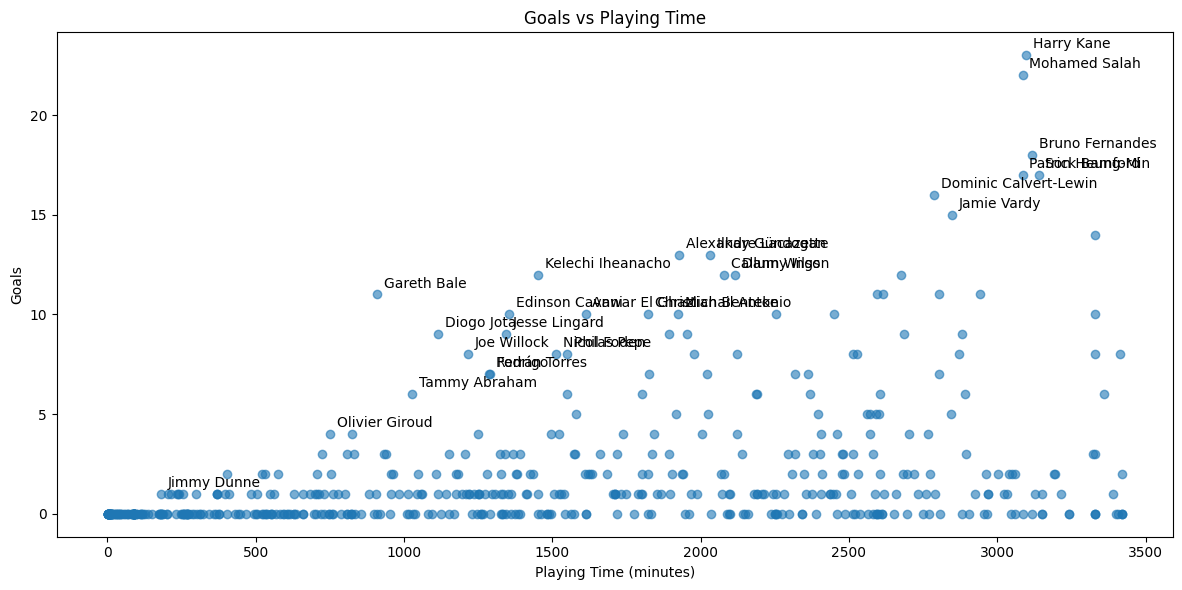

In [25]:
# First, execute the playing_time_analysis() function to create 'goals_per_minute' column:
def playing_time_analysis():
    """Analyze player performance relative to playing time"""
    df['goals_per_minute'] = df['goals'] / df['time']
    df['assists_per_minute'] = df['assists'] / df['time']

    plt.figure(figsize=(12, 6))
    plt.scatter(df['time'], df['goals'], alpha=0.6)
    plt.xlabel('Playing Time (minutes)')
    plt.ylabel('Goals')
    plt.title('Goals vs Playing Time')

    # Returning the modified dataframe,
    # so that the updated dataframe is now available globally.
    return df

df = playing_time_analysis()

# Assuming df is available, then, continue with your analysis below:
efficiency_threshold = df['goals_per_minute'].quantile(0.95)
efficient_scorers = df[df['goals_per_minute'] > efficiency_threshold]

import matplotlib.pyplot as plt # Imported the necessary library.

for idx, row in efficient_scorers.iterrows():
    plt.annotate(row['player_name'],
                (row['time'], row['goals']),
                xytext=(5, 5), textcoords='offset points')
plt.tight_layout()
plt.show()


Running comprehensive analysis...


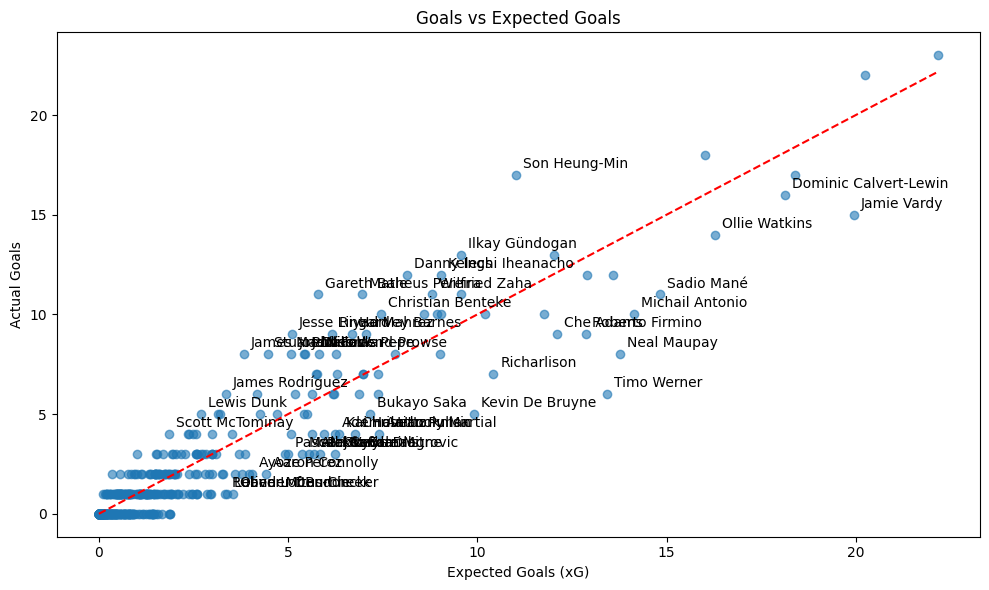


Average Statistics by Position:
          goals  assists  shots  key_passes
position                                   
D          0.95     0.75  10.04        8.31
D F M S    2.38     1.62  31.00       27.62
D M        1.62     2.56  17.81       23.75
D M S      0.69     1.10  13.18       14.00
D S        0.61     0.53   7.42        6.62
F         13.67     6.33  87.33       33.33
F M        9.00     4.00  39.00       18.00
F M S      4.83     2.84  41.16       25.68
F S        5.20     1.69  33.80       12.49
GK         0.03     0.06   0.03        0.33
GK S       0.00     0.00   0.00        0.00
M          2.75     2.25  24.88       22.62
M S        1.67     1.58  18.58       17.25
S          0.00     0.00   0.60        0.22


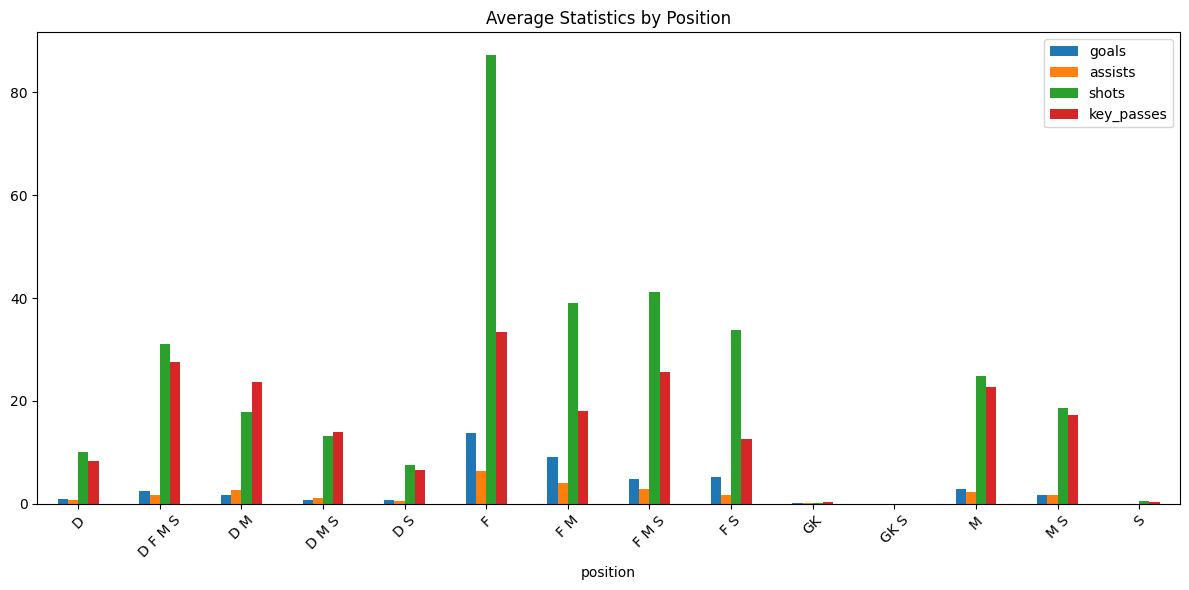


Top 10 Players by goals:


,player_name,team_title,goals
0,Harry Kane,Tottenham,23
1,Mohamed Salah,Liverpool,22
2,Bruno Fernandes,Manchester United,18
3,Son Heung-Min,Tottenham,17
4,Patrick Bamford,Leeds,17
5,Dominic Calvert-Lewin,Everton,16
6,Jamie Vardy,Leicester,15
7,Ollie Watkins,Aston Villa,14
8,Ilkay Gündogan,Manchester City,13
9,Alexandre Lacazette,Arsenal,13



Top 10 Players by assists:


,player_name,team_title,assists
0,Harry Kane,Tottenham,14
2,Bruno Fernandes,Manchester United,12
58,Kevin De Bruyne,Manchester City,11
3,Son Heung-Min,Tottenham,10
51,Jack Grealish,Aston Villa,10
6,Jamie Vardy,Leicester,9
15,Marcus Rashford,Manchester United,9
57,Raphinha,Leeds,9
41,Jack Harrison,Leeds,8
49,Timo Werner,Chelsea,8



Top 10 Players by xGChain:


,player_name,team_title,xGChain
1,Mohamed Salah,Liverpool,28.968234
2,Bruno Fernandes,Manchester United,26.911412
26,Roberto Firmino,Liverpool,25.271458
16,Sadio Mané,Liverpool,24.998923
0,Harry Kane,Tottenham,24.995648
22,Raheem Sterling,Manchester City,24.088666
4,Patrick Bamford,Leeds,23.394953
130,Trent Alexander-Arnold,Liverpool,23.107881
7,Ollie Watkins,Aston Villa,22.014021
56,Mason Mount,Chelsea,21.696074



Top 10 Players by xGBuildup:


,player_name,team_title,xGBuildup
132,Rodri,Manchester City,18.323006
130,Trent Alexander-Arnold,Liverpool,17.648908
263,Rúben Dias,Manchester City,16.126552
204,Andrew Robertson,Liverpool,15.435009
55,Youri Tielemans,Leicester,14.945469
110,Pierre-Emile Højbjerg,Tottenham,14.680379
131,João Cancelo,Manchester City,14.480545
40,Stuart Dallas,Leeds,13.809802
362,Mateo Kovacic,Chelsea,13.035792
125,Harry Maguire,Manchester United,13.018347


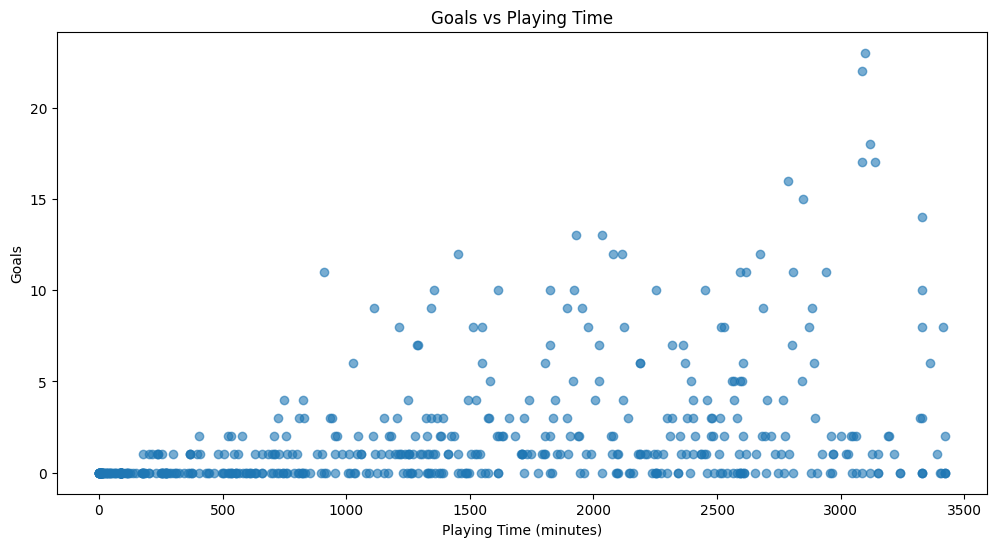

In [26]:
print("\nRunning comprehensive analysis...")
print("="*50)

analyze_scoring_efficiency()
position_analysis()
top_performers()
playing_time_analysis()

# Additional team-based analysis
team_stats = df.groupby('team_title').agg({
    'goals': 'sum',
    'assists': 'sum',
    'xG': 'sum',
    'xA': 'sum'
}).round(2)

In [27]:
print("\nTeam Performance Summary:")
print("="*50)
display(team_stats.sort_values('goals', ascending=False))

# Correlation analysis
correlation_matrix = df[['goals', 'xG', 'assists', 'xA', 'shots', 'key_passes']].corr()


Team Performance Summary:


,goals,assists,xG,xA
team_title,,,,
Manchester City,77,50,76.21,53.37
Manchester United,68,50,61.95,43.43
Tottenham,66,50,57.84,38.31
Liverpool,64,43,72.07,52.78
Leicester,64,45,59.10,36.09
Leeds,60,45,59.85,45.46
West Ham,57,44,60.52,43.05
Chelsea,56,38,69.29,46.84
Arsenal,51,36,52.15,35.27


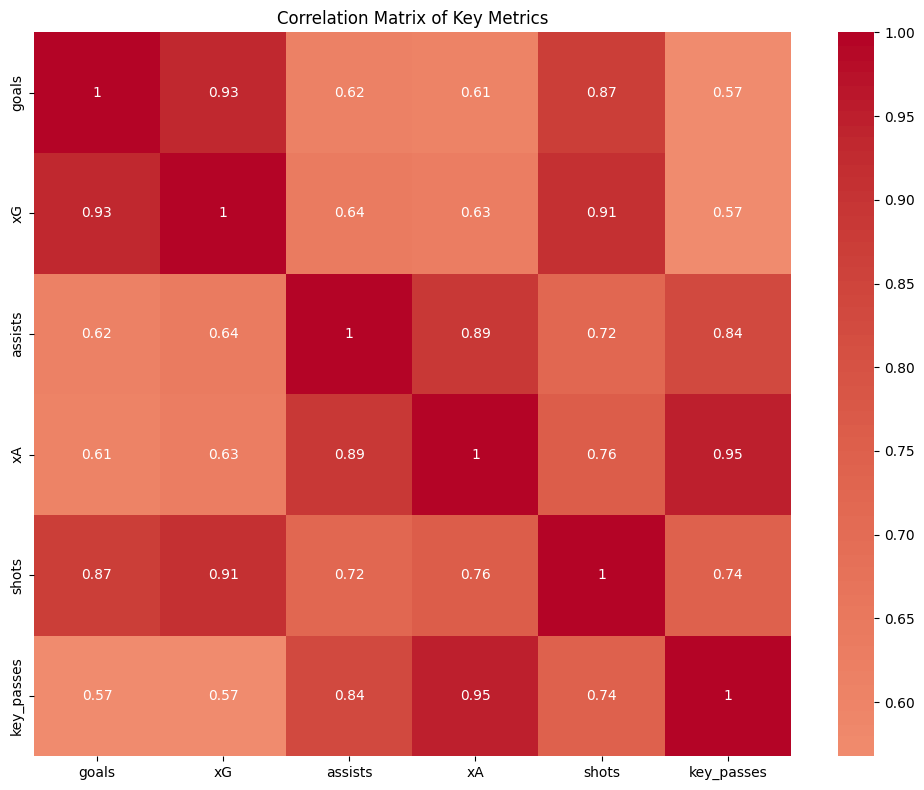

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Metrics')
plt.tight_layout()
plt.show()